# Global Bike Sales (2013-2023) - full analysis project
This notebook shows how I went through the data cleaning process, uncovered insights, and visualized each business question with charts. The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/hamedahmadinia/global-bike-sales-dataset-2013-2023) and contains information about products, revenue, profit, shipping costs, insurance, and more.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Quick Overview

In [2]:
#Load the data
df = pd.read_csv('bike_sales_data_world_2013_2023.csv')

In [3]:
#See the dimension of the data
df.shape

(226072, 33)

In [4]:
#Display the first 5 rows
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
0,2017-11-26,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,...,4,13.25,2,25,True,40.58,GLS,Standard,Basic,30 Days
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
2,2019-03-23,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,3,8.97,1,0,True,74.54,GLS,Express,Premium,7 Days
3,2015-03-23,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,5,2.56,1,10,False,61.87,DHL,Same Day,NaN,7 Days
4,2018-05-15,15,May,2018,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,5,11.21,1,6,False,19.82,GLS,Same Day,Basic,30 Days


In [5]:
#Get a concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit            226072 non-null  int64  
 16  Cost              22

In [6]:
#Summary statistics for numerical columns
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Rating,Shipping_Weight,Delivery_Time,Discount,Shipping_Cost
count,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000
mean,15.665753,2017.992887,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,3.005724,7.748286,5.001009,14.488172,52.471199
std,8.781547,3.163415,11.021911,9.561836,549.834267,922.069180,453.886439,884.864161,1309.091778,1.416783,4.185197,2.579064,8.631218,27.398519
min,1.000000,2013.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,1.000000,0.500000,1.000000,0.000000,5.000000
25%,8.000000,2015.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,2.000000,4.120000,3.000000,7.000000,28.700000
50%,16.000000,2018.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,3.000000,7.750000,5.000000,15.000000,52.580000
75%,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,4.000000,11.360000,7.000000,22.000000,76.230000
max,31.000000,2023.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,5.000000,15.000000,9.000000,29.000000,100.000000


## Data Cleaning & Preprocessing

### Handling Missing Values

In [7]:
#Check for missing values
df.isna().sum()

Date                    0
Day                     0
Month                   0
Year                    0
Customer_Age            0
Age_Group               0
Customer_Gender         0
Country                 0
State                   0
Product_Category        0
Sub_Category            0
Product                 0
Order_Quantity          0
Unit_Cost               0
Unit_Price              0
Profit                  0
Cost                    0
Revenue                 0
Size                    0
Color                   0
Material                0
Warranty                0
Manufacturer            0
Rating                  0
Shipping_Weight         0
Delivery_Time           0
Discount                0
Eco_Friendly            0
Shipping_Cost           0
Shipping_Company        0
Shipping_Type           0
Insurance           75282
Return_Policy           0
dtype: int64

#### Handling Missing Values in "Insurance" column

In [8]:
#Check unique values in the "Insurance" column
df['Insurance'].unique()

array(['Basic', nan, 'Premium'], dtype=object)

In [9]:
#Fill missing insurance with 'Unknown'
df['Insurance'] = df['Insurance'].fillna('Unknown')

In [10]:
#Check for missing values in the dataset
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Size                0
Color               0
Material            0
Warranty            0
Manufacturer        0
Rating              0
Shipping_Weight     0
Delivery_Time       0
Discount            0
Eco_Friendly        0
Shipping_Cost       0
Shipping_Company    0
Shipping_Type       0
Insurance           0
Return_Policy       0
dtype: int64

### Handling Duplicates Data

In [11]:
#Check for duplicate data
df.duplicated().sum()

113011

In [12]:
#Drop duplicate values
df = df.drop_duplicates()

In [13]:
#Check for duplicate data
df.duplicated().sum()

0

### Check and Handling Column One by One

#### "Date" Column

In [14]:
#Convert "Date" to datetime
df['Date'] = pd.to_datetime(df['Date'])

#### "Customer_Gender" Column

In [15]:
gender = {
    'M': 'Male',
    'F': 'Female'
}

df['Customer_Gender'] = df['Customer_Gender'].replace(gender, regex=False)

#### Check All Columns Using Loop

In [16]:
columns = df.columns

for col in columns:
    print("Column:", col)
    print("Total of unique column:", df[col].nunique())
    print("Unique values (max 10):", df[col].unique()[:10])
    print("-" * 40)

Column: Date
Total of unique column: 4015
Unique values (max 10): <DatetimeArray>
['2017-11-26 00:00:00', '2014-11-26 00:00:00', '2019-03-23 00:00:00',
 '2015-03-23 00:00:00', '2018-05-15 00:00:00', '2023-05-15 00:00:00',
 '2015-05-22 00:00:00', '2014-05-22 00:00:00', '2021-02-22 00:00:00',
 '2023-02-22 00:00:00']
Length: 10, dtype: datetime64[ns]
----------------------------------------
Column: Day
Total of unique column: 31
Unique values (max 10): [26 23 15 22 30  2 17 27 25 13]
----------------------------------------
Column: Month
Total of unique column: 12
Unique values (max 10): ['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June']
----------------------------------------
Column: Year
Total of unique column: 11
Unique values (max 10): [2017 2014 2019 2015 2018 2023 2021 2020 2013 2022]
----------------------------------------
Column: Customer_Age
Total of unique column: 70
Unique values (max 10): [19 49 47 35 32 34 29 51 48 43]
-----------

## Exploratory Data Analysis (EDA) & Data Visualizations

### 1. What is the total profit and revenue made each year?

In [17]:
df1 = df.groupby('Year')[['Revenue', 'Profit']].sum().reset_index()
df1

,Year,Revenue,Profit
0,2013,7782163,2933932
1,2014,7753872,2929264
2,2015,7853503,2963825
3,2016,7971310,3026307
4,2017,7862502,2963335
5,2018,7595956,2867297
6,2019,7865723,2980984
7,2020,7550455,2870185
8,2021,7671898,2895217
9,2022,7592783,2839784


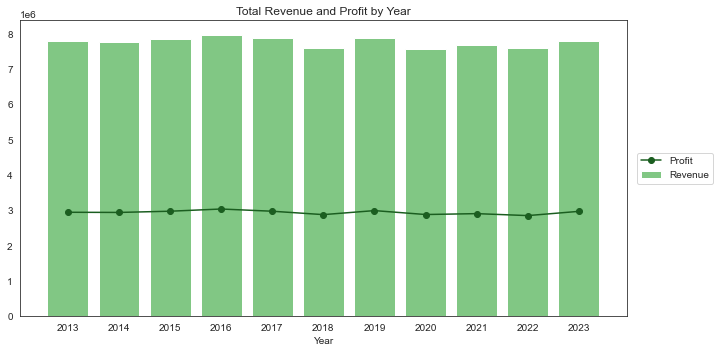

In [18]:
#Set style
sns.set_style("white")
plt.figure(figsize=(10,5))

plt.bar(df1['Year'], df1['Revenue'], color='#81c784', label='Revenue') #Bar chart revenue
plt.plot(df1['Year'].values, df1['Profit'].values, color='#1b5e20', marker='o', label='Profit') #Line chart profit

#Label and title
plt.title("Total Revenue and Profit by Year")
plt.xlabel("Year")
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.xticks(df1['Year'])
plt.tight_layout()

#Save the picture
plt.savefig("plot1.png", dpi=300, bbox_inches='tight')

plt.show()

### 2. Which age group and gender contribute the highest revenue?

In [19]:
df2 = df.groupby(['Age_Group', 'Customer_Gender'])['Revenue'].sum().reset_index()
df2

,Age_Group,Customer_Gender,Revenue
0,Adults (35-64),Female,21273892
1,Adults (35-64),Male,21328097
2,Seniors (64+),Female,130050
3,Seniors (64+),Male,177992
4,Young Adults (25-34),Female,15197837
5,Young Adults (25-34),Male,15466425
6,Youth (<25),Female,5342158
7,Youth (<25),Male,6381747


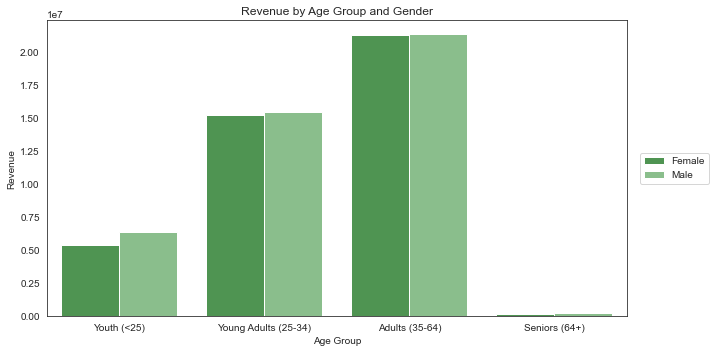

In [20]:
#Plot
age_order = ['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (64+)']
df2['Age_Group'] = pd.Categorical(df2['Age_Group'], categories=age_order, ordered=True)

plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='Age_Group', y='Revenue', hue='Customer_Gender', palette=['#43a047', '#81c784'])
plt.title("Revenue by Age Group and Gender")
plt.xlabel("Age Group")
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()

#Save the picture
plt.savefig("plot2.png", dpi=300, bbox_inches='tight')

plt.show()

### 3. Which product category contribute the highest revenue?

In [21]:
df3 = df.groupby('Product_Category')['Revenue'].sum().reset_index()
df3

,Product_Category,Revenue
0,Accessories,15119947
1,Bikes,61802247
2,Clothing,8376004


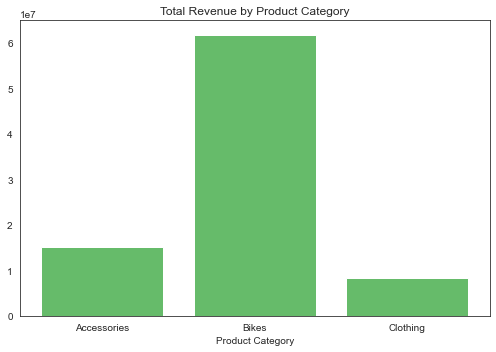

In [22]:
#Plot
plt.figure(figsize=(7,5))
plt.bar(df3['Product_Category'], df3['Revenue'], color='#66bb6a')
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.tight_layout()

#Save the picture
plt.savefig("plot3.png", dpi=300, bbox_inches='tight')

plt.show()

### 4. Which are the top 10 countries contributing the most profit?

In [23]:
df4 = df.groupby('Country')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()
df4

,Country,Profit
0,United States,11073644
1,Australia,6776030
2,United Kingdom,4413853
3,Canada,3717296
4,Germany,3359995
5,France,2880282
6,Lithuania,2257
7,Finland,1008
8,Greece,760
9,Netherlands,750


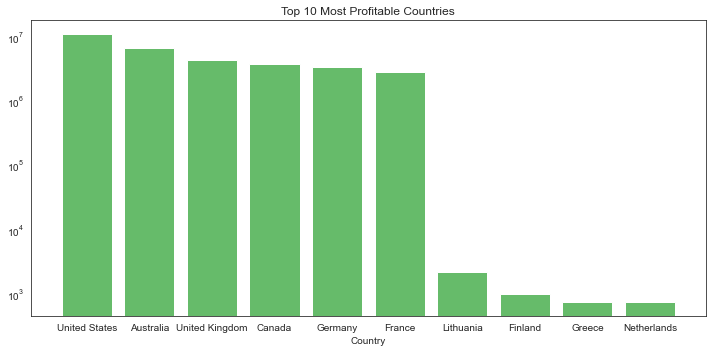

In [24]:
#Plot
plt.figure(figsize=(10,5))
plt.bar(df4['Country'], df4['Profit'], color='#66bb6a')
plt.yscale('log')
plt.title("Top 10 Most Profitable Countries")
plt.xlabel("Country")
plt.tight_layout()

#Save the picture
plt.savefig("plot4.png", dpi=300, bbox_inches='tight')

plt.show()

### 5. What are the top 10 best-selling products?

In [25]:
df5 = df.groupby('Product')['Order_Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
df5

,Product,Order_Quantity
0,Water Bottle - 30 oz.,164134
1,Patch Kit/8 Patches,157614
2,Mountain Tire Tube,102792
3,AWC Logo Cap,67334
4,"Sport-100 Helmet, Red",63691
5,Road Tire Tube,62296
6,"Sport-100 Helmet, Black",62131
7,Fender Set - Mountain,62118
8,Touring Tire Tube,56802
9,"Sport-100 Helmet, Blue",55895


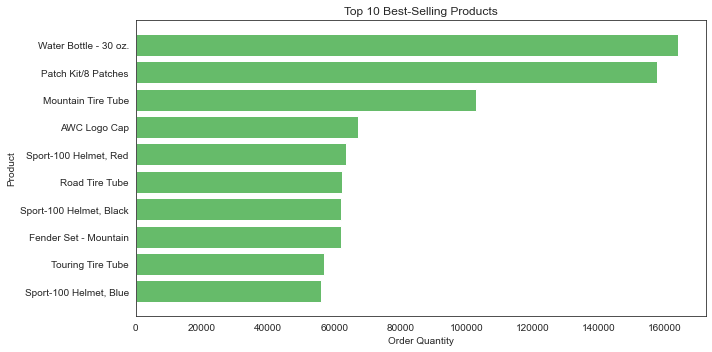

In [26]:
#Plot
plt.figure(figsize=(10,5))
plt.barh(df5['Product'][::-1], df5['Order_Quantity'][::-1], color='#66bb6a')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Order Quantity")
plt.ylabel("Product")
plt.tight_layout()

#Save the picture
plt.savefig("plot5.png", dpi=300, bbox_inches='tight')

plt.show()

### 6. Which shipping method is used the most?

In [27]:
df6 = df['Shipping_Type'].value_counts().sort_values(ascending=False)
df6

Shipping_Type
Same Day    28312
Standard    28311
Next Day    28291
Express     28147
Name: count, dtype: int64

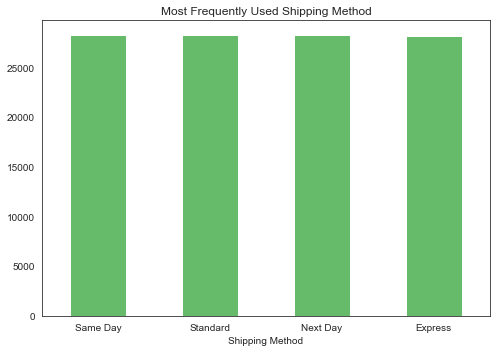

In [28]:
#Plot
plt.figure(figsize=(7,5))
df6.plot(kind='bar', color='#66bb6a')
plt.title("Most Frequently Used Shipping Method")
plt.xlabel("Shipping Method")
plt.xticks(rotation=0)
plt.tight_layout()

#Save the picture
plt.savefig("plot6.png", dpi=300, bbox_inches='tight')

plt.show()

### 7. What are the correlations between key sales performance metrics?

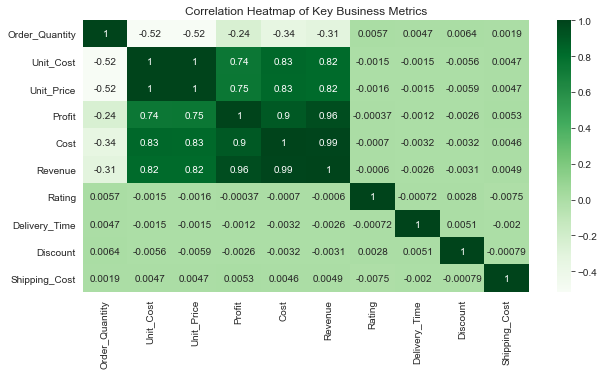

In [29]:
columns = ['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue', 'Rating', 'Delivery_Time', 'Discount', 'Shipping_Cost']
heatmap_df = df[columns]

plt.figure(figsize=(10,5))
sns.heatmap(data=heatmap_df.corr(), annot=True, cmap='Greens')
plt.title("Correlation Heatmap of Key Business Metrics")

#Save the picture
plt.savefig("plot8.png", dpi=300, bbox_inches='tight')

plt.show()